# Figure 3, Basement Sediment Plot

In [26]:
import pygmt
import pandas as pd
import os
import geopandas as gpd

In [27]:
cd

C:\Users\matthewt


In [28]:
cd Documents\Python_Scripts\GRL_2021_Figures

C:\Users\matthewt\Documents\Python_Scripts\GRL_2021_Figures


In [29]:
!gmt grdinfo tmp/rosetta_basement_g80kfilt.nc

tmp/rosetta_basement_g80kfilt.nc: Title: z
tmp/rosetta_basement_g80kfilt.nc: Command: grdfilter tmp/rosetta_werner_surface_masked.nc -D0 -Fg80000 -Gtmp/rosetta_basement_g80kfilt.nc -Nr
tmp/rosetta_basement_g80kfilt.nc: Remark: 
tmp/rosetta_basement_g80kfilt.nc: Pixel node registration used [Cartesian grid]
tmp/rosetta_basement_g80kfilt.nc: Grid file format: nf = GMT netCDF format (32-bit float), CF-1.7
tmp/rosetta_basement_g80kfilt.nc: x_min: -3330000 x_max: 1900000 x_inc: 5000 name: x n_columns: 1046
tmp/rosetta_basement_g80kfilt.nc: y_min: -3330000 y_max: 1850000 y_inc: 5000 name: y n_rows: 1036
tmp/rosetta_basement_g80kfilt.nc: v_min: -4502.23681641 v_max: -585.460144043 name: z
tmp/rosetta_basement_g80kfilt.nc: scale_factor: 1 add_offset: 0
tmp/rosetta_basement_g80kfilt.nc: format: netCDF-4 chunk_size: 131,130 shuffle: on deflation_level: 3


gmtset [WARNING]: Representation of font type not recognized. Using default.
gmtset [WARNING]: Representation of font type not recognized. Using default.
psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


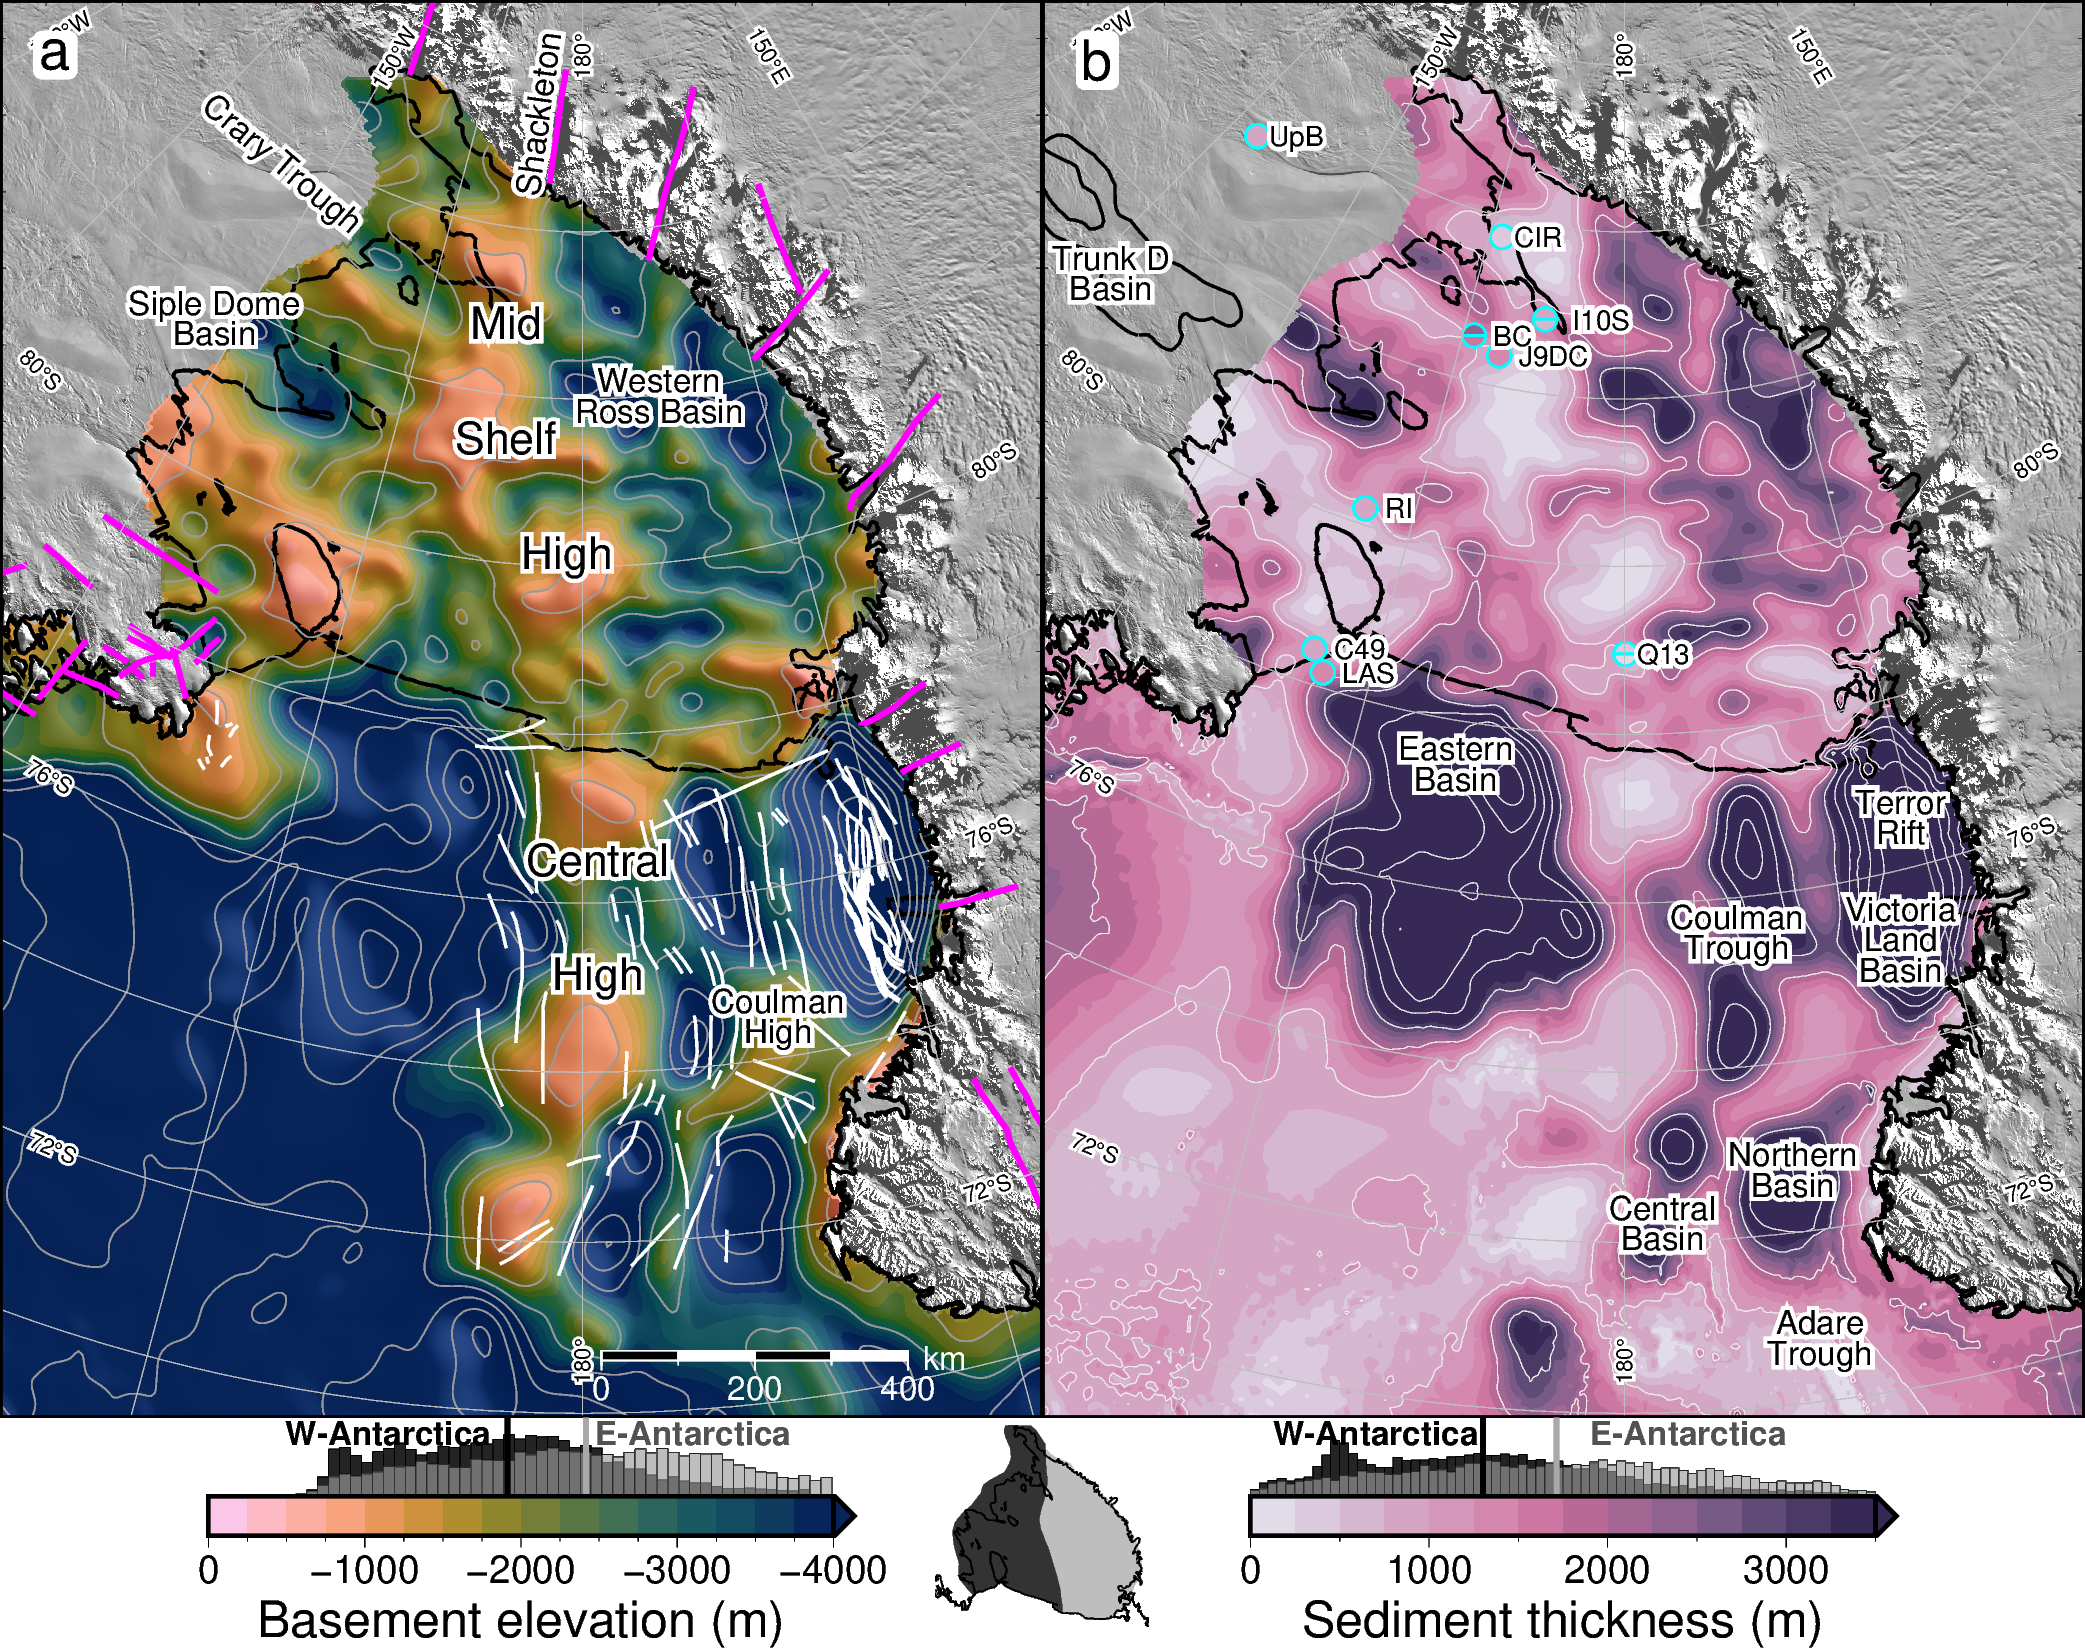

In [30]:
figheight=180 # in mm

# for Ross Embayment
ris_xl= -760_000
ris_yl= -2_200_000 #N extent
ris_xh= 600_000
ris_yh= -350_000 #S extent

# Calculate the figure width and map scale
figwidth=figheight*(ris_xh-ris_xl)/(ris_yh-ris_yl)
risratio = (ris_yh - ris_yl) / (figheight/1000)
# Make a GMT region string and projection strings in both PS71 and Lon/Lat
risreg = str(ris_xl) + '/' + str(ris_xh) + '/' + str(ris_yl) + '/' + str(ris_yh) #W/E/S/N
risproj = "x1:" + str(risratio)
risproj_ll = "s0/-90/-71/1:" + str(risratio)

### Make color maps for MOA
pygmt.makecpt(series = '15000/17000/1', cmap = 'gray', continuous = True, output = 'cpts/moa.cpt')

# Initialize figure and plot MOA as the base map with ticks every 100 km both directions
fig = pygmt.Figure()
with pygmt.config(MAP_FRAME_TYPE = 'inside'):
    fig.grdimage(region = risreg, projection = risproj, frame=["nwse", "xf100000", "yf100000", "g0"],  
                 grid ='..\map_datasets\moa750_2009_hp1_v1.1.tif', 
                 cmap = 'cpts\moa.cpt', transparency=30)
#BASEMENT 
#GRID      
pygmt.makecpt(cmap='batlow', background='o', series='-4000/0/17+n', output = 'cpts/RIS_basement.cpt')#, continuous=True)
fig.grdimage(projection = risproj, 
             grid = 'rosetta_lindeque_basement_g80kfilt.nc', 
             cmap = 'cpts/RIS_basement.cpt', 
             shading="grdgradient+a45+ne.5+m-.2", 
             dpi='500', nan_transparent=True)

# Plot the grounding/coast lines
# fig.plot(data=gpd.read_file('../shapefiles/MEaSUREs_groundingline.shp') , region = risreg, projection = risproj, pen = '1.2p,black', verbose='e')
# fig.plot(data=gpd.read_file('../shapefiles/MEaSUREs_coastline.shp'), pen='1.2p,black', verbose='e')
fig.plot(data=gpd.read_file('..\RIS_basement_sediment\Data/Download/GroundingLine_Antarctica_v02.shp'), 
         pen = '1.2p,black', verbose='e')
fig.plot(data=gpd.read_file('..\RIS_basement_sediment\Data/Download/Coastline_Antarctica_v02.shp'), 
         pen='1.2p,black', verbose='e')


#CONTOURS
fig.grdcontour(grid='rosetta_lindeque_basement_g80kfilt.nc', interval=1000, pen='thinner,grey60') #limit='-2001/-999',
 
# Plot Sauli et al. 2021 Terror Rift Faults.
fig.plot(data = gpd.read_file('../shapefiles/Sauli_2021_faults.shp'), pen = 'thick,white')
# Plot Chiappini 2002 Ross Fault (Behrendt 1996)
fig.plot(data = gpd.read_file('../shapefiles/chiappini_2002_Ross_Fault.shp'), pen = 'thick,white')
# Plot Salvini 1997 others faults, W-RS, excluded Terror Rift
fig.plot(data = gpd.read_file('../shapefiles/salvini_1997_other_faults_no_TR.shp'), pen = 'thick,white')

# Plot Goodge 2020 Faults, TAM
fig.plot(data = gpd.read_file('../shapefiles/goodge_faults.shp'), pen = 'thickest,magenta')

# Plot Luyendyk et al. 2001 Faults, offshore EDVII
fig.plot(data = gpd.read_file('../shapefiles/luyendyk_2001_faults.shp'), pen = 'thick,white')
# Plot Siddoway et al. 2008 Faults, EVII
fig.plot(data = gpd.read_file('../shapefiles/siddoway_2008_EVII_faults.shp'),pen = 'thickest,magenta')
# Plot Ferraccioli et al. 2002 Faults, EVII
fig.plot(data = gpd.read_file('../shapefiles/ferraccioli_2002_faults.shp'), pen = 'thickest,magenta')

# Plot graticules overtop, at 2d latitude and 15d longitude
with pygmt.config(MAP_ANNOT_OFFSET_PRIMARY = '-2p', MAP_FRAME_TYPE = 'inside',
                  MAP_ANNOT_OBLIQUE = 0, FONT_ANNOT_PRIMARY = '8p,black,-=2p,white', 
                  MAP_GRID_PEN_PRIMARY = 'grey', MAP_TICK_LENGTH_PRIMARY = '-10p',
                  MAP_TICK_PEN_PRIMARY = 'thinnest,grey', FORMAT_GEO_MAP = 'dddF',
                  MAP_POLAR_CAP = '90/90', ):
    fig.basemap(projection = risproj_ll, region = risreg,
                frame = ["NSWE", "xa30g15", "ya4g2"], verbose='e')
    with pygmt.config(FONT_ANNOT_PRIMARY = '8p,black'):
        fig.basemap(projection = risproj_ll, region = risreg,
                frame = ["NSWE", "xa30", "ya4"], verbose='e')

# Location labels
fig.text(textfiles="place_labels_RE.tsv",
         projection = risproj,
         angle=True,
         font= '12,Helvetica,black,-=3p,white',
         justify=True,)
fig.text(textfiles="place_labels_RE.tsv",
         projection = risproj,
         angle=True,
         font= '12p,Helvetica,black',
         justify=True,) 

# Location labels
fig.text(textfiles="MSH_CH.tsv",
         projection = risproj,
         angle=True,
         font= '16,Helvetica,black,-=3p,white',
         justify=True,)
fig.text(textfiles="MSH_CH.tsv",
         projection = risproj,
         angle=True,
         font= '16p,Helvetica,black',
         justify=True,) 

fig.text(projection = risproj, 
            region = risreg,
            position='TL',
            text = "a",
            fill = 'white',
            font = '20p,Helvetica,black',
            offset = 'j.5/.5',
            clearance = '+tO')

# SCALEBAR
with pygmt.config(FONT_ANNOT_PRIMARY = '12p,white', FONT_LABEL = '12p,white', MAP_SCALE_HEIGHT='7p', MAP_TICK_PEN_PRIMARY = '0.5p,white'):
    fig.basemap(projection = risproj_ll, map_scale='jBR+w400k+c170E/71S+f+l"km"+ar+o1.7c/0.6c',verbose='e')
    
# COLORBAR
barwidth = figwidth/10 * 0.6 # color bar width is 40% of the map width, in cm
bar_offset= (figwidth/10 - (barwidth))/2
pos_str = 'jBL+w' + str(-barwidth) + 'c/.5c+jTL+o'+str(bar_offset)+'c/1c+h+eb'
fig.shift_origin(xshift=str(bar_offset)+'c', yshift="-1c",)
hist_reg1 = '0/4000/0/5' # this needs to match CMAP limits, 0/5 represent 0-5%, postive since we want the color bar reversed
EANT_basement=pygmt.grd2xyz(grid='tmp/rosetta_lindeque_basement_g80kfilt_RIS_EANT_mask.nc')
EANT_basement.z=EANT_basement.z*-1
WANT_basement=pygmt.grd2xyz(grid='tmp/rosetta_lindeque_basement_g80kfilt_RIS_WANT_mask.nc')
WANT_basement.z=WANT_basement.z*-1
fig.histogram( data=EANT_basement.z,
                region=hist_reg1,
                fill='grey',
                projection="X"+str(barwidth)+"c/1c",
                frame=False,
                series=70,
                pen=".1p",
                histtype=1,
                transparency=0) 
fig.histogram( data=WANT_basement.z,
                region=hist_reg1,
                fill='gray14',
                projection="X"+str(barwidth)+"c/1c",
                frame=False,
                series=70,
                pen=".1p",
                histtype=1,
                transparency=0)  
fig.histogram( data=EANT_basement.z,
                region=hist_reg1,
                fill='grey',
                projection="X"+str(barwidth)+"c/1c",
                frame=False,
                series=70,
                pen=".1p",
                histtype=1,
                transparency=50) 
fig.plot(region=hist_reg1,x=[WANT_basement.z.mean(),WANT_basement.z.mean()], y=[0,5], pen='2p,black')
fig.plot(region=hist_reg1,x=[EANT_basement.z.mean(),EANT_basement.z.mean()], y=[0,5], pen='2p,darkgray')
fig.text(x=1150, y=4,
        text = "W-Antarctica",
        font = '12p,Helvetica-Bold,black') 
fig.text(x=3100, y=4,
        text = "E-Antarctica",
        font = '12p,Helvetica-Bold,gray32')
fig.shift_origin(xshift='-'+str(bar_offset)+'c', yshift="1c",)

with pygmt.config(FONT_ANNOT_PRIMARY = '14p,black', FONT_LABEL = '18p,black'):
    fig.colorbar(cmap='cpts/RIS_basement.cpt', position = pos_str, frame=['xa1000f250+l"Basement elevation (m)"'], verbose='e')  

    
    


    
fig.shift_origin(xshift=figwidth/10)






with pygmt.config(MAP_FRAME_TYPE = 'inside'):
    fig.grdimage(region = risreg, projection = risproj, frame=["nwse", "xf100000", "yf100000", "g0"], 
                 grid ='..\map_datasets\moa750_2009_hp1_v1.1.tif', 
                 cmap = 'cpts/moa.cpt', dpi='500', transparency=30)

# #Sediment thickness grid
sed_cmap_lim='0/3500' 
pygmt.makecpt(cmap = 'acton', series = str(sed_cmap_lim)+'/15+n', reverse = True, #oslo
              output = 'cpts\sed_thickness.cpt', background='o') #, truncate='0/.9')  

fig.grdimage(projection = risproj, grid='RE_sedthickness.nc', cmap='cpts/sed_thickness.cpt', nan_transparent=True, dpi='500')

# Plot the grounding/coast lines in white
# fig.plot(data=gpd.read_file('..\shapefiles\MEaSUREs_groundingline.shp') , region = risreg, projection = risproj, pen = '1.2p,black', verbose='e')
# fig.plot(data=gpd.read_file('..\shapefiles\MEaSUREs_coastline.shp'), pen='1.2p,black', verbose='e')
fig.plot(data=gpd.read_file('..\RIS_basement_sediment\Data/Download/GroundingLine_Antarctica_v02.shp'), 
         pen = '1.2p,black', verbose='e')
fig.plot(data=gpd.read_file('..\RIS_basement_sediment\Data/Download/Coastline_Antarctica_v02.shp'), 
         pen='1.2p,black', verbose='e')

#CONTOURS
fig.grdcontour(grid='RE_sedthickness.nc', interval=1000, pen='thinnest,gray92') #limit='999/3001',

# Plot seismics basement points
stations=pd.read_csv('../map_datasets/RIS_Basement_Sedthickness_Seismics.csv', header=0, skiprows=[6], engine='python')
stations['sed_max']=stations.sed_thickness + stations.Uncertainty
stations['sed_min']=stations.sed_thickness - stations.Uncertainty
stations_max = stations[['X','Y','sed_max']].copy()
stations_max['start']=0
stations_max['stop']=180
stations_min = stations[['X','Y','sed_min']].copy()
stations_min['start']=180
stations_min['stop']=360
# as circles, with upper and lower error limits
fig.plot(projection = risproj,
         data=stations_max,
         pen = '.8p,cyan',
         cmap = 'cpts/sed_thickness.cpt',
         style = 'w0.3c')
fig.plot(data=stations_min,
         pen = '.8p,cyan',
         cmap = 'cpts/sed_thickness.cpt',
         style = 'w0.3c')
fig.plot(x=stations.X[stations.sed_min==stations.sed_max],
         y=stations.Y[stations.sed_min==stations.sed_max],
         color=stations.sed_min[stations.sed_min==stations.sed_max],
         pen = '.8p,cyan',
         cmap = 'cpts/sed_thickness.cpt',
         style = 'c0.3c')

# Plot graticules overtop, at 2d latitude and 15d longitude
with pygmt.config(MAP_ANNOT_OFFSET_PRIMARY = '-2p', MAP_FRAME_TYPE = 'inside',
                  MAP_ANNOT_OBLIQUE = 0, FONT_ANNOT_PRIMARY = '8p,black,-=2p,white', 
                  MAP_GRID_PEN_PRIMARY = 'grey', MAP_TICK_LENGTH_PRIMARY = '-10p',
                  MAP_TICK_PEN_PRIMARY = 'thinnest,grey', FORMAT_GEO_MAP = 'dddF',
                  MAP_POLAR_CAP = '90/90', ):
    fig.basemap(projection = risproj_ll, region = risreg,
                frame = ["NSWE", "xa30g15", "ya4g2"], verbose='e')
    with pygmt.config(FONT_ANNOT_PRIMARY = '8p,black'):
        fig.basemap(projection = risproj_ll, region = risreg,
                frame = ["NSWE", "xa30", "ya4"], verbose='e')  

# labels
fig.text(projection = risproj,
         x = stations.X,
         y = stations.Y,
         text = stations["Stations ID"],
         font = '10p,Helvetica,black,-=3p,white',
         justify = 'ML',
         offset = 'j0.15c/0c',)
fig.text(x = stations.X,
         y = stations.Y,
         text = stations["Stations ID"],
         font = '10p,Helvetica,black',
         justify = 'ML',
         offset = 'j0.15c/0c',)

fig.text(projection = risproj, 
        region = risreg,
        position='TL',
        text = "b",
        fill = 'white',
        font = '20p,Helvetica,black',
        offset = 'j.5/.5',
        clearance = '+tO')

# Plot Bell et al. 2006 Basins
fig.plot(data=gpd.read_file('../shapefiles/bell_2006_outline.shp'), pen = 'thick,black')

# Location labels
fig.text(textfiles="place_labels_RE_sed_plot.tsv",
         projection = risproj,
         angle=True,
         font='12p,Helvetica,black,-=3p,white',
         justify=True)
fig.text(textfiles="place_labels_RE_sed_plot.tsv",
         projection = risproj,
         angle=True,
         font='12p,Helvetica,black',
         justify=True)

# COLORBAR
pos_str = 'jBL+w' + str(barwidth) + 'c/.5c+jTL+o'+str(bar_offset)+'c/1c+h+ef' 
hist_reg = str(sed_cmap_lim)+'/0/5',   # this needs to match CMAP limits, 0/5 represent 0-5%
fig.shift_origin(xshift=str(bar_offset)+'c', yshift="-1c",)
WANT_sediment=pygmt.grd2xyz(grid='tmp/RE_sedthickness_RIS_WANT_mask.nc')
EANT_sediment=pygmt.grd2xyz(grid='tmp/RE_sedthickness_RIS_EANT_mask.nc')
fig.histogram( data=EANT_sediment.z,
                region=hist_reg,
                fill='grey',
                projection="X"+str(barwidth)+"c/1c",
                frame=False,
                series=50,#width of bin in data units
                pen=".1p",
                histtype=1,
                transparency=0) 
fig.histogram( data=WANT_sediment.z,
                region=hist_reg,
                fill='gray14',
                projection="X"+str(barwidth)+"c/1c",
                frame=False,
                series=50,
                pen=".1p",
                histtype=1,
                transparency=0) 
fig.histogram( data=EANT_sediment.z,
                region=hist_reg,
                fill='grey',
                projection="X"+str(barwidth)+"c/1c",
                frame=False,
                series=50,
                pen=".1p",
                histtype=1,
                transparency=50) 
fig.plot(region=hist_reg,x=[WANT_sediment.z.mean(),WANT_sediment.z.mean()], y=[0,5], pen='2p,black')
fig.plot(region=hist_reg,x=[EANT_sediment.z.mean(),EANT_sediment.z.mean()], y=[0,5], pen='2p,darkgray')
  
fig.text(x=700, y=4,
        text = "W-Antarctica",
        font = '12p,Helvetica-Bold,black')
fig.text(x=2450,y=4,
        text = "E-Antarctica",
        font = '12p,Helvetica-Bold,gray32') 
fig.shift_origin(xshift='-'+str(bar_offset)+'c', yshift="1c",)
with pygmt.config(FONT_ANNOT_PRIMARY = '14p,black', FONT_LABEL = '18p,black'):
    fig.colorbar(cmap='cpts/sed_thickness.cpt', position = pos_str, frame=['xa1000f500+l"Sediment thickness (m)"'], verbose='e')
# INSET MAP
shelfwidth = 2.7 # width of inset in cm
shelfreg = '-690000/431000/-1390000/-374000'
shelfmap = 'X' + str(shelfwidth) + 'c'

with fig.inset(position='JTL+jCM+w'+str(shelfwidth)+'c+o0c/-2.3c'):
#     fig.plot(projection = shelfmap, region = shelfreg, x=-107153,y=-911141, style='c2.5c', color='white')
    fig.plot(projection = shelfmap, region = shelfreg, data = gpd.read_file('..\shapefiles\RIS_East.shp'), color = "gray", transparency = 0)
    fig.plot(data = gpd.read_file('..\shapefiles\RIS_West.shp'), color = "gray20", transparency = 0)
    fig.plot(data=gpd.read_file('..\shapefiles\MEaSUREs_groundingline.shp'), pen='0.5p,black')
    fig.plot(data=gpd.read_file('..\shapefiles\MEaSUREs_coastline.shp'), pen='0.5p,black')

fig.show(dpi=200)

In [32]:
out='..\..\Manuscripts\GRL_Mag_Basement_2020\Fig3_basement_sediment.jpg'
fig.savefig(out, dpi=1000)

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


In [10]:
print('EANT sediment thickness mean:\n',EANT_sediment.z.mean(),'\n')
print('WANT sediment thickness mean:\n',WANT_sediment.z.mean(),'\n')
print('EANT basement mean:\n',EANT_basement.z.mean(),'\n')
print('WANT basement mean:\n',WANT_basement.z.mean(),'\n')

EANT sediment thickness mean:
 1712.9721348711973 

WANT sediment thickness mean:
 1302.0470547720113 

EANT basement mean:
 2415.680770844527 

WANT basement mean:
 1914.2367850225894 



In [20]:
!gmt grdmask ..\shapefiles\RIS_outline.shp -Gtmp/tmp_RIS_mask.nc -I5000+e -R-3330000/1900000/-3330000/1850000 -rp -NNaN/1/1
!gmt grdmask ..\shapefiles\WANT_RIS.shp -Gtmp/tmp_WANT_mask.nc -I5000+e -R-3330000/1900000/-3330000/1850000 -rp -NNaN/1/1
!gmt grdmask ..\shapefiles\WANT_RIS.shp -Gtmp/tmp_EANT_mask.nc -I5000+e -R-3330000/1900000/-3330000/1850000 -rp -N1/NaN/NaN

!gmt grdmath -Df rosetta_lindeque_basement_g80kfilt.nc tmp/tmp_RIS_mask.nc MUL = tmp/rosetta_lindeque_basement_g80kfilt_RIS_mask.nc
!gmt grdmath -Df tmp/rosetta_lindeque_basement_g80kfilt_RIS_mask.nc tmp/tmp_WANT_mask.nc MUL = tmp/rosetta_lindeque_basement_g80kfilt_RIS_WANT_mask.nc
!gmt grdmath -Df tmp/rosetta_lindeque_basement_g80kfilt_RIS_mask.nc tmp/tmp_EANT_mask.nc MUL = tmp/rosetta_lindeque_basement_g80kfilt_RIS_EANT_mask.nc

!gmt grdmath -Df RE_sedthickness.nc tmp/tmp_RIS_mask.nc MUL = tmp/RE_sedthickness_RIS_mask.nc
!gmt grdmath -Df tmp/RE_sedthickness_RIS_mask.nc tmp/tmp_WANT_mask.nc MUL = tmp/RE_sedthickness_RIS_WANT_mask.nc
!gmt grdmath -Df tmp/RE_sedthickness_RIS_mask.nc tmp/tmp_EANT_mask.nc MUL = tmp/RE_sedthickness_RIS_EANT_mask.nc